In [1]:
import torch
from torch.nn import Linear
from torch import nn

In [2]:
# 获得训练数据
import numpy as np
import random
x = sorted([random.randint(-1000, 1000) * 0.01 for i in range(10)])
y = sorted([random.randint(-1000, 1000) * 0.01 for i in range(10)])
x_train = [[i] for i in x]
y_train = [[i] for i in y]
x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train, '\n', y_train)

[[-7.96]
 [-6.11]
 [-2.12]
 [-2.04]
 [-1.15]
 [-0.93]
 [ 1.29]
 [ 4.66]
 [ 5.55]
 [ 7.06]] 
 [[-7.96]
 [-5.3 ]
 [ 1.58]
 [ 2.97]
 [ 3.55]
 [ 5.12]
 [ 5.54]
 [ 6.52]
 [ 8.49]
 [ 9.62]]


In [3]:
# 画图
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
# 将numpy变量转化为tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_train = x_train.float()
y_train = y_train.float()
print(x_train, '\n', y_train)

tensor([[-7.9600],
        [-6.1100],
        [-2.1200],
        [-2.0400],
        [-1.1500],
        [-0.9300],
        [ 1.2900],
        [ 4.6600],
        [ 5.5500],
        [ 7.0600]]) 
 tensor([[-7.9600],
        [-5.3000],
        [ 1.5800],
        [ 2.9700],
        [ 3.5500],
        [ 5.1200],
        [ 5.5400],
        [ 6.5200],
        [ 8.4900],
        [ 9.6200]])


In [5]:
# 定义模型， 应当包含 __init__（）函数和forward()函数
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = Linear(1, 1)
    
    def forward(self, x) :
        out = self.linear(x)
        return out
if torch.cuda.is_available():
    model = LinearRegression().cuda()
else :
    model = LinearRegression()

In [6]:
# 定义损失函数和优化函数
criterison = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [9]:
# 开始训练模型
from torch.autograd import Variable
# 定义要跑的批(epoch)数
num_epochs = 1000
for epoch in range(num_epochs) :
    # 获得每一批数据的输出
    if torch.cuda.is_available() :
        inputs = Variable(x_train).cuda()
        target = Variable(y_train).cuda()
    else :
        inputs = Variable(x_train)
        target = Variable(y_train)
    # forward前向计算
    out = model(inputs)
    loss = criterison(out, target)
    # backward 计算误差项及更新参数
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 一轮训练结束， 输出信息
    if(epoch + 1) % 20 == 0 :
        print('Epoch[{}/{}], loss : {:.6f}'.format(epoch + 1, num_epochs, loss.item()))

Epoch[20/1000], loss : 9.972759
Epoch[40/1000], loss : 9.119440
Epoch[60/1000], loss : 8.603325
Epoch[80/1000], loss : 8.173468
Epoch[100/1000], loss : 7.784637
Epoch[120/1000], loss : 7.427059
Epoch[140/1000], loss : 7.097196
Epoch[160/1000], loss : 6.792721
Epoch[180/1000], loss : 6.511652
Epoch[200/1000], loss : 6.252183
Epoch[220/1000], loss : 6.012653
Epoch[240/1000], loss : 5.791531
Epoch[260/1000], loss : 5.587403
Epoch[280/1000], loss : 5.398961
Epoch[300/1000], loss : 5.224998
Epoch[320/1000], loss : 5.064407
Epoch[340/1000], loss : 4.916156
Epoch[360/1000], loss : 4.779297
Epoch[380/1000], loss : 4.652955
Epoch[400/1000], loss : 4.536325
Epoch[420/1000], loss : 4.428654
Epoch[440/1000], loss : 4.329259
Epoch[460/1000], loss : 4.237502
Epoch[480/1000], loss : 4.152796
Epoch[500/1000], loss : 4.074599
Epoch[520/1000], loss : 4.002412
Epoch[540/1000], loss : 3.935772
Epoch[560/1000], loss : 3.874253
Epoch[580/1000], loss : 3.817461
Epoch[600/1000], loss : 3.765035
Epoch[620/1000

In [15]:
# 将模型变成测试模式
model.eval()

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

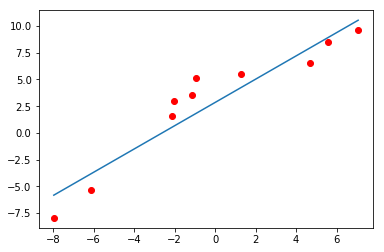

In [16]:
# 测试结果与真实结果作比较
predict = model(Variable(x_train.cuda()))
predict = predict.data.cpu().numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')